In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

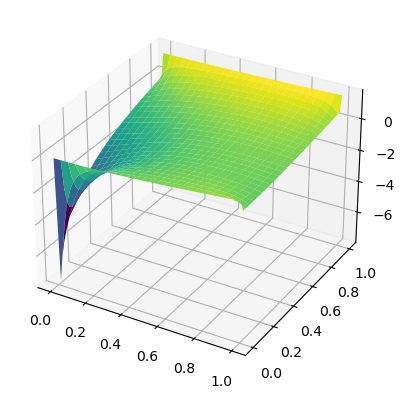

In [2]:
def Poisson(xl, xr, yb, yt, M, N):
    # Define the functions f, g1, g2, g3, and g4
    def f(x, y):
        return 0

    def g1(x):
        return np.log(x**2 + 1)

    def g2(x):
        return np.log(x**2 + 4)

    def g3(y):
        return 2 * np.log(y)

    def g4(y):
        return np.log(y**2 + 1)

    m = M + 1
    n = N + 1
    mn = m * n
    h = (xr - xl) / M
    h2 = h**2
    k = (yt - yb) / N
    k2 = k**2
    x = xl + np.arange(M + 1) * h
    y = yb + np.arange(N + 1) * k
    A = np.zeros((mn, mn))
    b = np.zeros(mn)

    for i in range(1, m - 1):
        for j in range(1, n - 1):
            A[i + j * m, (i - 1) + j * m] = 1 / h2
            A[i + j * m, (i + 1) + j * m] = 1 / h2
            A[i + j * m, i + j * m] = -2 / h2 - 2 / k2
            A[i + j * m, i + (j - 1) * m] = 1 / k2
            A[i + j * m, i + (j + 1) * m] = 1 / k2
            b[i + j * m] = f(x[i], y[j])

    for i in range(m):
        j = 0
        A[i + j * m, i + j * m] = 1
        b[i + j * m] = g1(x[i])
        j = n - 1
        A[i + j * m, i + j * m] = 1
        b[i + j * m] = g2(x[i])

    for j in range(1, n - 1):
        i = 0
        A[i + j * m, i + j * m] = 1
        b[i + j * m] = g3(y[j])
        i = m - 1
        A[i + j * m, i + j * m] = 1
        b[i + j * m] = g4(y[j])

    v = np.linalg.solve(A, b)
    w = v[:mn].reshape((m, n))

    # Create a 3D plot
    X, Y = np.meshgrid(x, y)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, w, cmap='viridis')
    plt.show()

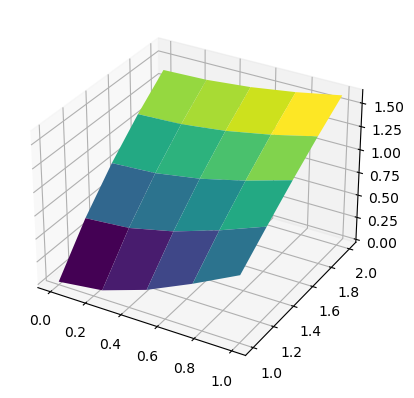

In [3]:
# Example usage
Poisson(0, 1, 1, 2, 4, 4)
